<a href="https://colab.research.google.com/github/Rama389/AI-Projects/blob/main/Supervised_Learning_PCA_FDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PROBLEM 1:Visualizing PCA vs. Fisher Scatter Plots

Brief Summary of PCA and Fisher Distance


**PCA**
1. Captures the maximum variance in the first principal direction
2. Captures this variance in the second principal direction
3. Both the principal components are orthogonal in nature
4. Variance in projected space = wTCw (C- Eigen Vector)

**Fisher Discriminant Analysis**
1. This concept is nothing but class seperation approach
2. Fisher distance is of prime importance
3. Larger the mean and smaller the variance is a better feature

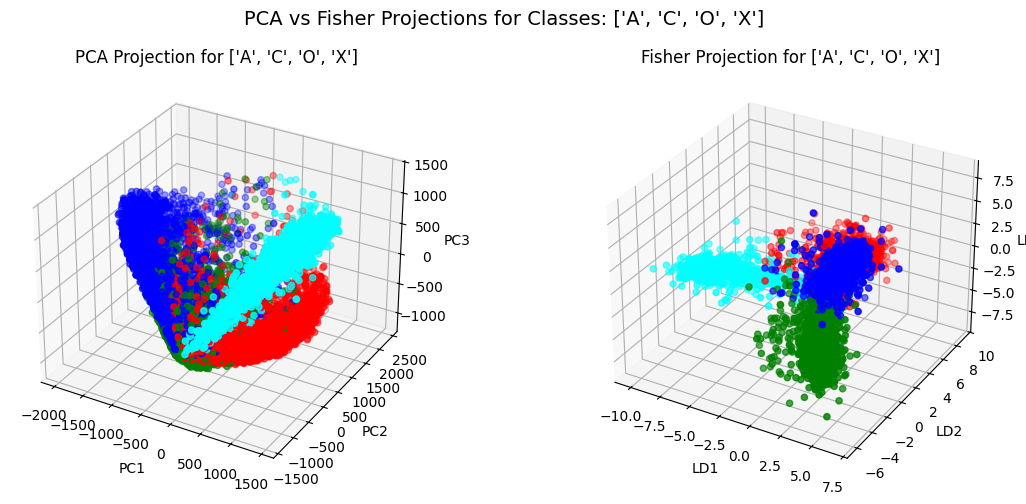

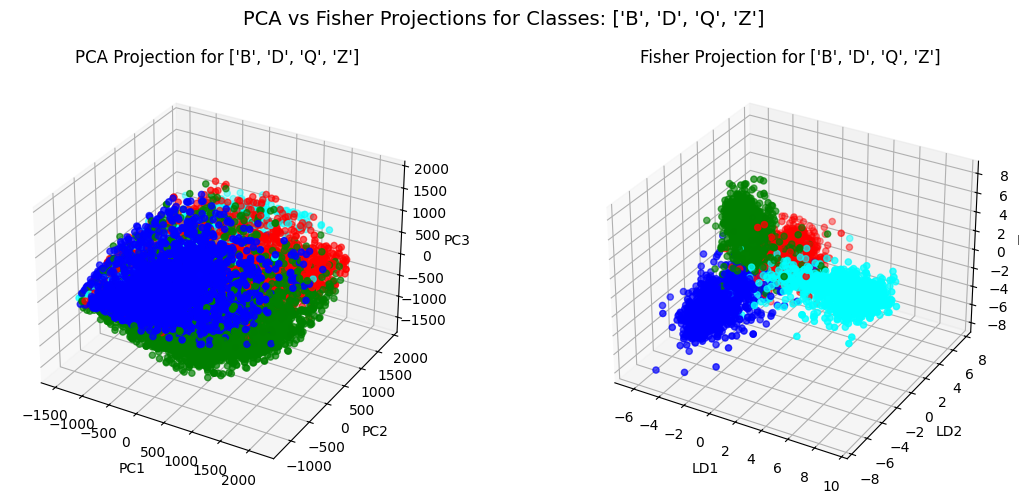

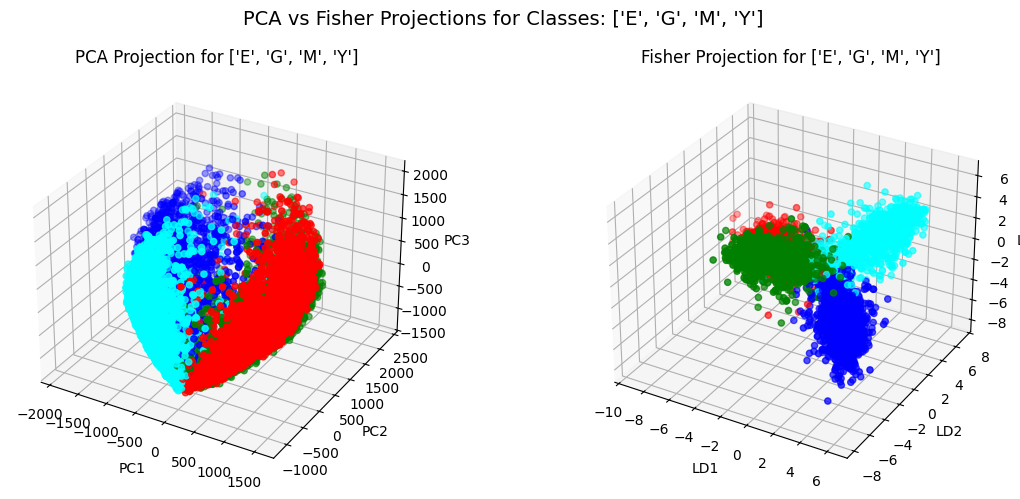

In [2]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from mpl_toolkits.mplot3d import Axes3D
import warnings

# Suppress specific warnings
warnings.filterwarnings('ignore', category=FutureWarning)
# warnings.filterwarnings('ignore', category=PerformanceWarning) # Removed this line

# STEP 1: Load dataset
df = pd.read_csv("tmnst Dataset.csv")

# STEP 2: Define the PCA vs Fisher function
def pca_vs_fisher_3d(df, selected_classes):
    """
    Visualizes PCA vs Fisher (LDA) 3D scatter plots for 4 selected classes.

    Parameters:
    - df: Pandas DataFrame with label column first and pixel features after.
    - selected_classes: List of exactly 4 capital letter labels (e.g. ['A', 'C', 'O', 'X'])
    """
    assert len(selected_classes) == 4, "Exactly 4 classes must be selected."

    label_col = df.columns[0]
    feature_cols = df.columns[1:-1] if 'class' in df.columns else df.columns[1:]

    # Filter and encode selected classes
    df_sel = df[df[label_col].isin(selected_classes)].copy()
    df_sel['label_encoded'] = df_sel[label_col].astype('category').cat.codes
    X = df_sel[feature_cols].values
    y = df_sel['label_encoded'].values

    # Class colors (fixed)
    colors = ['red', 'green', 'blue', 'cyan']
    color_map = [colors[i] for i in y]

    # === Part 1: PCA ===
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X)

    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=color_map)
    ax1.set_title(f'PCA Projection for {selected_classes}')
    ax1.set_xlabel('PC1')
    ax1.set_ylabel('PC2')
    ax1.set_zlabel('PC3')

    # === Part 2: Fisher (LDA) ===
    lda = LDA(n_components=3)
    X_lda = lda.fit_transform(X, y)

    ax2 = fig.add_subplot(122, projection='3d')
    if X_lda.shape[1] == 3:
        ax2.scatter(X_lda[:, 0], X_lda[:, 1], X_lda[:, 2], c=color_map)
    else:
        # Pad with zeros if LDA < 3D (fallback)
        X_lda_pad = np.zeros((X_lda.shape[0], 3))
        X_lda_pad[:, :X_lda.shape[1]] = X_lda
        ax2.scatter(X_lda_pad[:, 0], X_lda_pad[:, 1], X_lda_pad[:, 2], c=color_map)

    ax2.set_title(f'Fisher Projection for {selected_classes}')
    ax2.set_xlabel('LD1')
    ax2.set_ylabel('LD2')
    ax2.set_zlabel('LD3')

    plt.suptitle(f'PCA vs Fisher Projections for Classes: {selected_classes}', fontsize=14)
    plt.tight_layout()
    plt.show()

# STEP 3: Call the function for three different 4-class combinations
pca_vs_fisher_3d(df, ['A', 'C', 'O', 'X'])
pca_vs_fisher_3d(df, ['B', 'D', 'Q', 'Z'])
pca_vs_fisher_3d(df, ['E', 'G', 'M', 'Y'])

**Comments**:
PCA and Fisher Projections are best for class [B,D,Q,Z] because the class seperation is good and for PCA the data is close to each other so that when data is projected maximum data points will be captured.